<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [57]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-01 17:40:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  76.4MB/s    in 2.6s    

2025-03-01 17:40:29 (76.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [58]:
!pip install pandas

In [59]:
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:

# Query 1: To get count of rows grouped by Age
query_1 = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""

df_age = pd.read_sql_query(query_1, conn)
print("Age group counts:")
print(df_age)

# Close the database connection
conn.close()

Age group counts:
                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


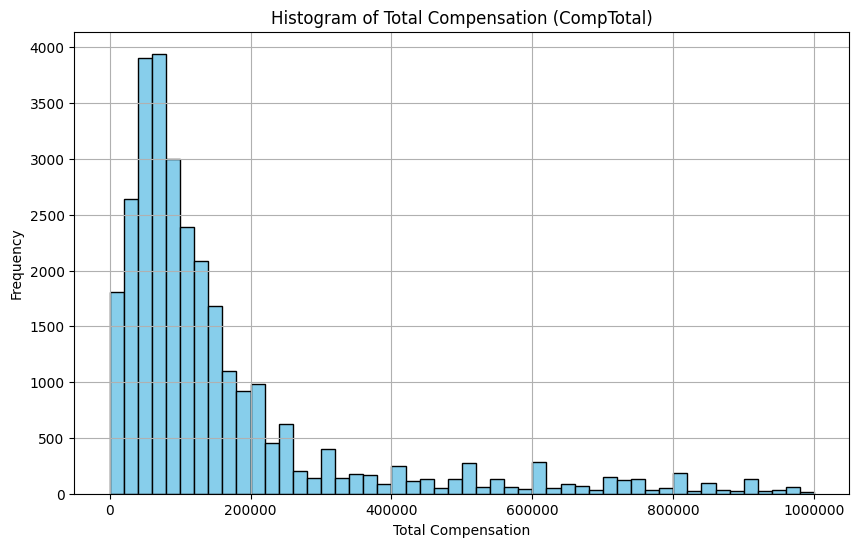

In [11]:
## Write your code here

from matplotlib.ticker import MaxNLocator

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Convert to numeric and check for extreme values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Remove unrealistic values (e.g., above $1 million)
df = df[df['CompTotal'] < 1_000_000]

# Drop NaNs
df = df.dropna(subset=['CompTotal'])

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')

# Disable scientific notation on the x-axis
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.ylabel('Frequency')
plt.grid(True)

plt.show()



**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


      YearsCodePro
0               17
1               27
2                7
3               11
4               25
...            ...
51605            7
51606           24
51607            3
51608            5
51609            2

[51610 rows x 1 columns]


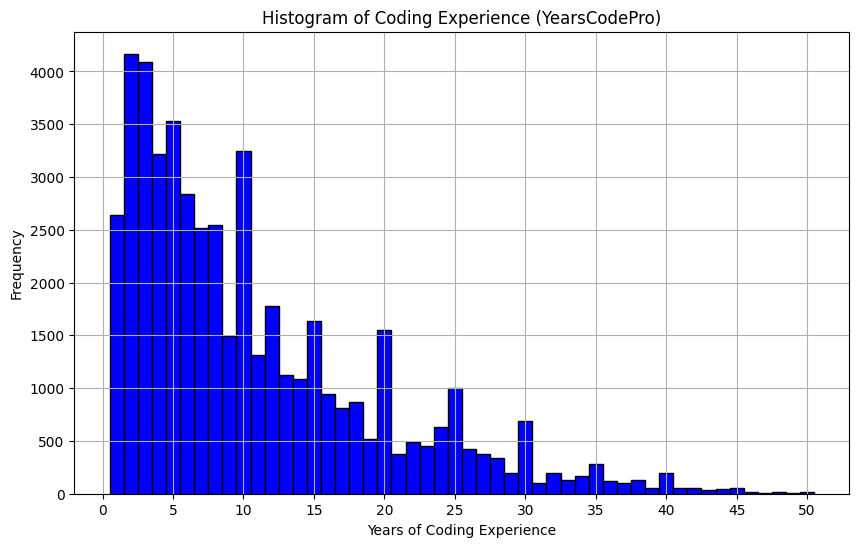

In [12]:
## Write your code here

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to fetch YearsCodePro data
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df_years_code_pro = pd.read_sql_query(QUERY, conn)

print(df_years_code_pro)

# Ensure YearsCodePro is numeric
df_years_code_pro['YearsCodePro'] = pd.to_numeric(df_years_code_pro['YearsCodePro'], errors='coerce')

# Plot a histogram of YearsCodePro
plt.figure(figsize=(10,6))

# Create bins for each unique value from the minimum to the maximum year
bins = range(int(df_years_code_pro['YearsCodePro'].min()), int(df_years_code_pro['YearsCodePro'].max()) +2)

# Plot the histogram
plt.hist(df_years_code_pro['YearsCodePro'], bins=bins, color='blue', edgecolor='black', align='left')
plt.title('Histogram of Coding Experience (YearsCodePro)')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.grid(True)

# Ensure x-axis is in ascending order
plt.xticks(range(0, int(df_years_code_pro['YearsCodePro'].max()) +1, 5))

plt.show()

conn.close()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


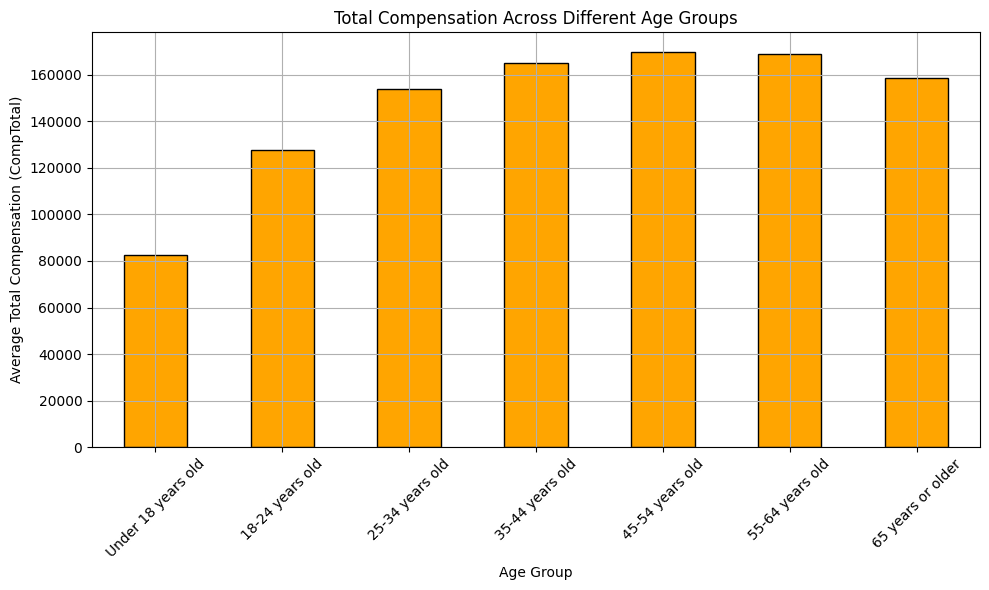

In [13]:
## Write your code here


# Load the dataset (replace with your actual file path)
df = pd.read_csv('survey-data.csv')

# Ensure that CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where 'CompTotal' or 'Age' is NaN
df.dropna(subset=['CompTotal', 'Age'], inplace=True)

# Remove unrealistic values (e.g., above $1 million)
df = df[df['CompTotal'] < 1_000_000]

# Map the Age column to midpoints of age ranges
mapping_age_group = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

# Map the 'Age' column to the midpoints of each group
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Define the age groups
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Calculate the average 'CompTotal' for each age group
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
age_group_avg_compensation.plot(kind='bar', color='orange', edgecolor='black')

# Set the x-ticks to be the age group names
plt.xticks(ticks=range(len(age_groups)), labels=age_groups, rotation=45)

# Customize the plot
plt.title('Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation (CompTotal)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


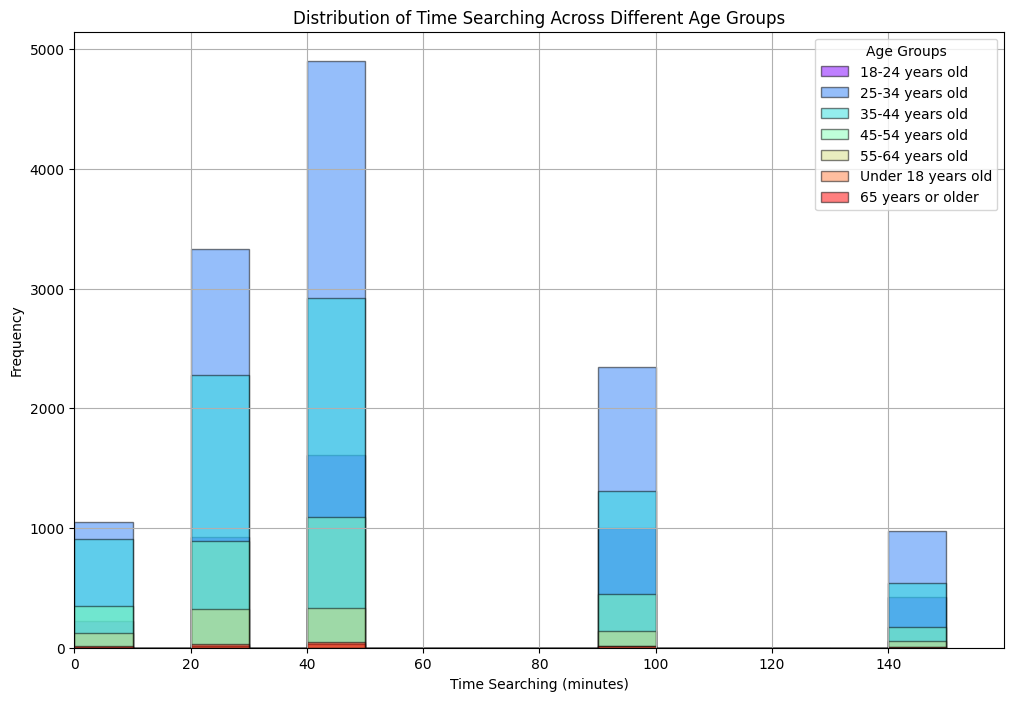

In [14]:
## Write your code here

import numpy as np

# Load the dataset
df = pd.read_csv('survey-data.csv')

df['Age'] = df['Age'].replace('Prefer not to say', pd.NA)
df.dropna(subset=['TimeSearching', 'Age'], inplace=True)

# Map the time categories to numeric values (minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# Map the Age column to age groups (midpoints of each range)
mapping_age_group = {
    "18-24 years old": (18 + 24) / 2,
    "25-34 years old": (25 + 34) / 2,
    "35-44 years old": (35 + 44) / 2,
    "45-54 years old": (45 + 54) / 2,
    "55-64 years old": (55 + 64) / 2,
    "Under 18 years old": 18,
    "65 years or older": 65
}

df['TimeSearchingMapped'] = df['TimeSearching'].map(time_mapping)
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Plot histograms for TimeSearching 
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(mapping_age_group)))

for age_group, color in zip(mapping_age_group.keys(), colors):
    age_group_data = df[df['Age'] == age_group]
    plt.hist(age_group_data['TimeSearchingMapped'], bins=range(0, 160, 10), 
             alpha=0.5, label=age_group, color=color, edgecolor='black')

plt.title('Distribution of Time Searching Across Different Age Groups')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Frequency')
plt.legend(title="Age Groups", loc='upper right')
plt.grid(True)

plt.xticks(range(0, 160, 20))
plt.xlim(0, 160)

plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


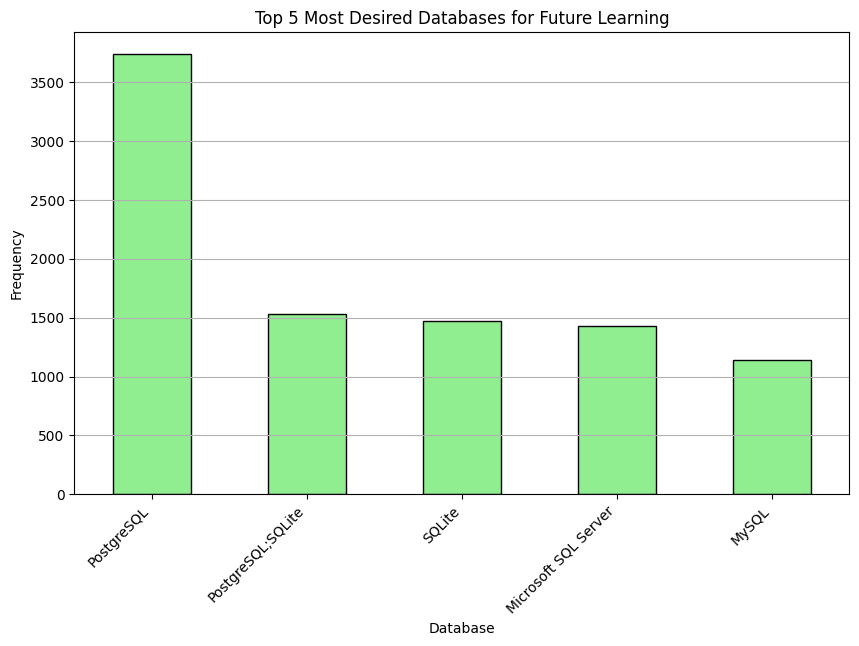

In [99]:
## Write your code here

df = pd.read_csv('survey-data.csv')

# Count the frequency of each database mentioned in the 'DatabaseWantToWorkWith' column
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Plot the histogram
plt.figure(figsize=(10,6))
top_5_databases.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# Show the plot
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


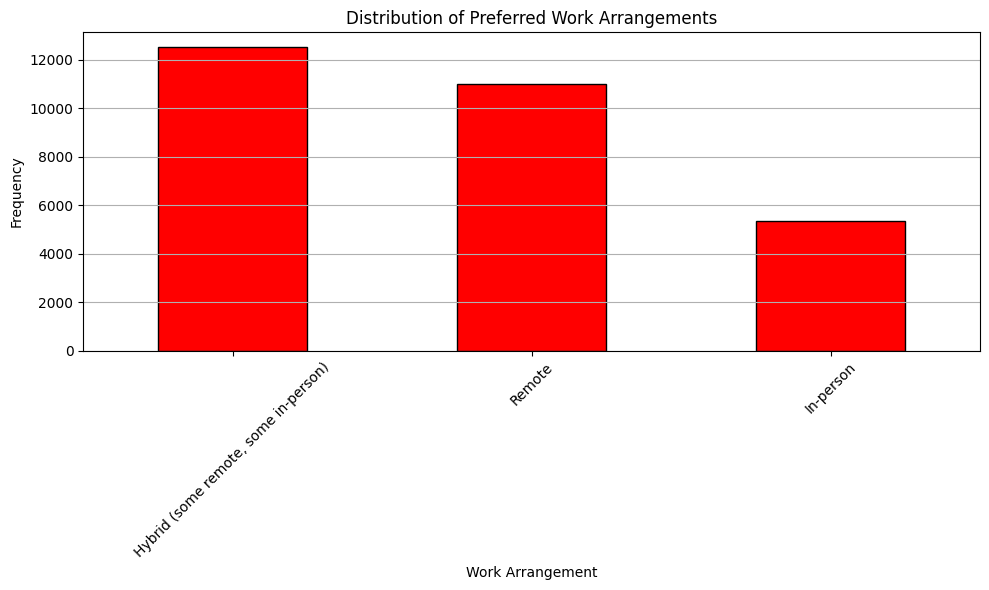

In [15]:
## Write your code here

# Ensure that the column representing work arrangements is a categorical type
df['RemoteWork'] = df['RemoteWork'].astype('category')

# Count the frequency of each preferred work arrangement
work_arrangement_counts = df['RemoteWork'].value_counts()

# Plot a bar chart 
plt.figure(figsize=(10, 6))
work_arrangement_counts.plot(kind='bar', color='red', edgecolor='black')

# Customize the plot
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


2        49.5
8        49.5
11       49.5
15       49.5
22       49.5
         ... 
65323    49.5
65332    49.5
65348    49.5
65378    49.5
65431    49.5
Name: AgeMapped, Length: 6249, dtype: float64


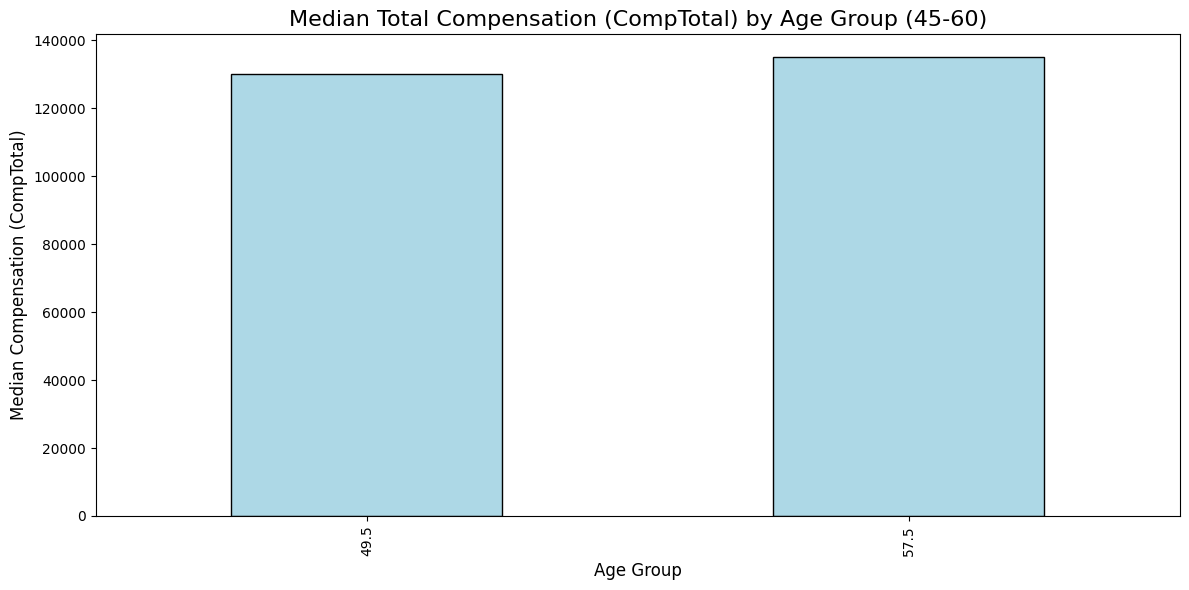

In [118]:
## Write your code here

# Query to fetch Age and CompTotal data
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old') AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Replace 'Prefer not to say' with NaN and drop rows with NaN in the 'Age' column
df.replace('Prefer not to say', np.nan, inplace=True)
df.dropna(subset=['Age'], inplace=True)

# Mapping for Age groups
mapping_age_group = {
    "45-54 years old": (45 + 54) / 2,
    "55-64 years old": (55 + 60) / 2,
}

# Apply the mapping to the Age column in the main dataframe
df['AgeMapped'] = df["Age"].map(mapping_age_group)

# Drop rows where AgeMapped is NaN
df.dropna(subset=['AgeMapped'], inplace=True)

# Print the AgeMapped column to verify
print(df['AgeMapped'])

# Step 1: Apply the same Age mapping to the df_age_comp to match 'AgeMapped'
df_age_comp['AgeMapped'] = df_age_comp['Age'].map(mapping_age_group)

# Drop rows where AgeMapped is NaN in df_age_comp
df_age_comp.dropna(subset=['AgeMapped'], inplace=True)

# Step 2: Calculate the median CompTotal for each AgeMapped value
median_comp_by_age_group = df_age_comp.groupby('AgeMapped')['CompTotal'].median()

# Step 3: Plot a bar plot of the median CompTotal for each age group
plt.figure(figsize=(12, 6))
median_comp_by_age_group.plot(kind='bar', color='lightblue', edgecolor='black')

# Step 4: Set the title and labels
plt.title('Median Total Compensation (CompTotal) by Age Group (45-60)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (CompTotal)', fontsize=12)

# Step 5: Show the plot
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()



**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


2     27.000000
8     22.170961
11    25.000000
15    27.000000
22    18.000000
Name: YearsCodePro, dtype: float64


/tmp/ipykernel_330/1711760213.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(df['YearsCodePro'].mean(), inplace=True)
/tmp/ipykernel_330/1711760213.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_sat_by_experience_group = df.groupby('ExperienceGroup')['JobSat'].mean()


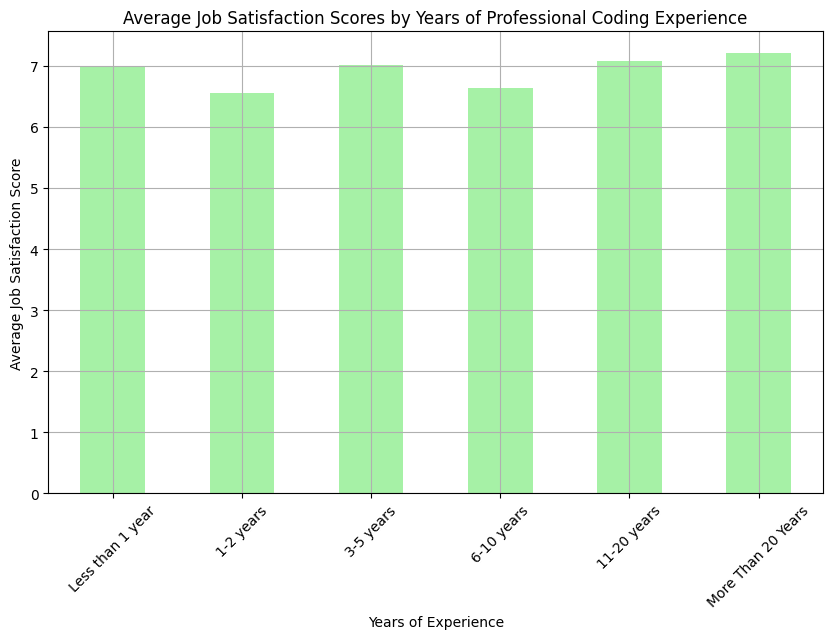

In [119]:
## Write your code here

# Ensure 'YearsCodePro' is numeric, coercing errors into NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Handle missing values
df['YearsCodePro'].fillna(df['YearsCodePro'].mean(), inplace=True)

print(df['YearsCodePro'].head())

# Create years of experience bins
experience_bins = [0, 1, 2, 5, 10, 20, 50] 
experience_labels = ['Less than 1 year', '1-2 years', '3-5 years', '6-10 years', '11-20 years', 'More Than 20 Years']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels, right=True)

# Group by ExperienceGroup and calculate the average JobSat score
avg_job_sat_by_experience_group = df.groupby('ExperienceGroup')['JobSat'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
avg_job_sat_by_experience_group.plot(kind='bar', alpha=0.8, color='lightgreen')
plt.title('Average Job Satisfaction Scores by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [120]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
